In [1]:
import numpy as np
import random as rd
from itertools import chain
import matplotlib.pyplot as plt

# 3 DOORS

In [2]:
conservative = 0
switcher = 0
newcamer = 0
rep = 1000000

for i in range(rep):
    game = np.zeros(shape=3)
    game[rd.randrange(3)] = 1 # only one door contains the car

    x = rd.sample(range(3),3) # doors opening order

    if game[x[0]] == 1:
        conservative = conservative + 1
    else:
        switcher = switcher + 1
    
    if game[x[1]] == 0:
        last = game[x[2]]
    else:
        last = game[x[1]]

    new = [game[x[0]], last]

    y = rd.randrange(2) # newcomer choice

    if new[y] == 1:
        newcamer = newcamer + 1
        
print(str(conservative*100/rep)+'%', str(switcher*100/rep)+'%', str(newcamer*100/rep)+'%')

33.3948% 66.6052% 49.9714%


# 100 DOORS

In [3]:
conservative = 0
switcher = 0
newcamer = 0
rep = 10000

for i in range(rep):
    
    game = np.zeros(shape=(100))
        
    game[rd.randrange(100)] = 1 # door with the car
    
    x = rd.randrange(100) # player choice
    
    while len(game) > 2:
        opn = rd.randrange(len(game))
        if opn < x and game[opn]== 0:
            game = np.delete(game, opn)
            x = x-1                       # delete doors without changing the indeces
        elif opn > x and game[opn]== 0:
            game = np.delete(game, opn)
    
    if game[x] == 1:   
            conservative = conservative + 1
    else:
            switcher = switcher + 1

    if game[rd.randrange(2)] == 1:
        newcamer = newcamer + 1
        
print(str(conservative*100/rep)+'%', str(switcher*100/rep)+'%', str(newcamer*100/rep)+'%')

0.96% 99.04% 49.42%


# N DOORS & M OPENED

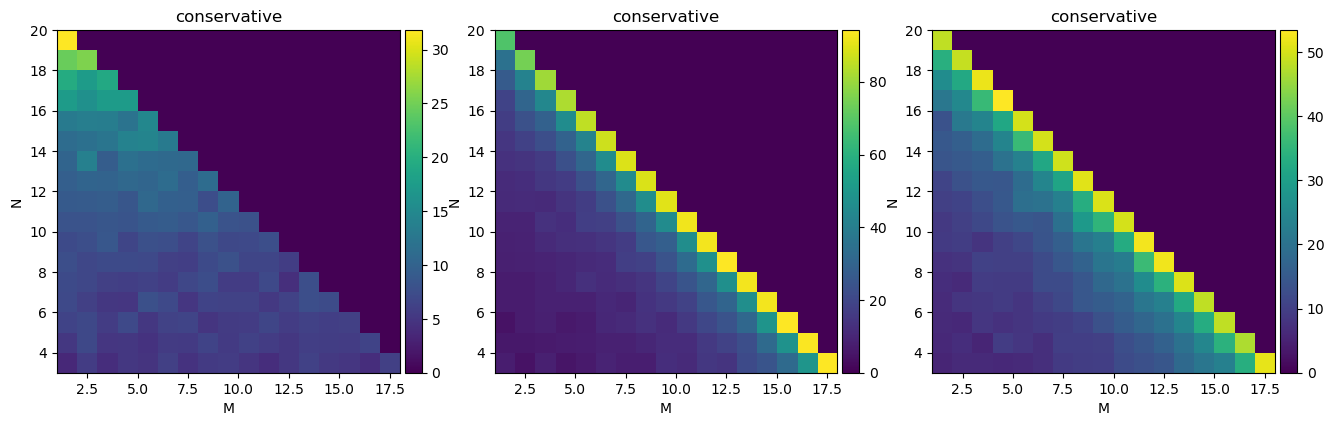

In [4]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

Nmax = 20
Mmax = Nmax-2
Nmin = 3
Mmin = Nmin-2
wins_cons = np.zeros(shape=(Nmax-Nmin,Mmax-Mmin))
wins_switch = np.zeros(shape=(Nmax-Nmin,Mmax-Mmin))
wins_new = np.zeros(shape=(Nmax-Nmin,Mmax-Mmin))
rep = 1000 #repetition of the game with the same M and N

for N in range(Nmin, Nmax):
    for M in range(Mmin, N-1):
        
        conservative = 0
        switcher = 0
        newcamer = 0
        
        for i in range(rep):

            game = np.zeros(shape=N)

            game[rd.randrange(N)] = 1

            x = rd.randrange(N)

            while len(game) > (N-M):
                opn = rd.randrange(len(game))
                if opn < x and game[opn]== 0:
                    game = np.delete(game, opn)
                    x = x-1
                elif opn > x and game[opn]== 0:
                    game = np.delete(game, opn)

            if game[x] == 1:   
                    conservative = conservative + 1
            else:
                rest = list(chain(game[0:x], game[x+1: N-M]))
                y = rd.randrange(N-M-1)
                if rest[y] == 1:       
                    switcher = switcher + 1

            if game[rd.randrange(N-M)] == 1:
                newcamer = newcamer + 1
        
        wins_cons[N-Nmin][M-Mmin] = conservative*100/rep
        wins_switch[N-Nmin][M-Mmin] = switcher*100/rep
        wins_new[N-Nmin][M-Mmin] = newcamer*100/rep

fig = plt.figure(figsize=(16,12))
extent = [Mmin,Mmax,Nmin,Nmax]

ax1 = fig.add_subplot(131)
im1 = ax1.imshow(wins_cons, extent=extent)
ax1.set_title('conservative')
ax1.set(xlabel = 'M', ylabel= 'N')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

ax2 = fig.add_subplot(132)
im2 = ax2.imshow(wins_switch, extent=extent)
ax2.set_title('conservative')
ax2.set(xlabel = 'M', ylabel= 'N')
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical')

ax3 = fig.add_subplot(133)
im3 = ax3.imshow(wins_new, extent=extent)
ax3.set_title('conservative')
ax3.set(xlabel = 'M', ylabel= 'N')
divider = make_axes_locatable(ax3)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im3, cax=cax, orientation='vertical')